# Assignment X: Topic Modeling Fish Leong (梁靜茹）

## Import necessary dependencies and settings

In [1]:
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random

pd.options.display.max_colwidth = 200


## Sample corpus of text documents

### Leong Songs

In [3]:
import pickle
with open('leong_seg.pickle', 'rb') as f:
    leong_seg = pickle.load(f)

In [4]:
corpus_df =pd.read_csv('../../../RepositoryData/data/data-chinese-songs-leong.csv')

In [5]:
corpus_df.head()

,title,lyric
0,飄洋過海來看你,為你我用了 半年的積蓄飄洋過海的來看你\n為了這次相聚 我連見面時的呼吸都曾反覆練習\n言語從來沒能將我的情意表達千萬分之一\n為了這個遺憾 我在夜裡想了又想不肯睡去\n記憶它總是慢慢的累積 在我心中無法抹去\n為了你的承諾 我在最絕望的時候都忍著不哭泣\n陌生的城市啊 熟悉的角落裡\n也曾彼此安慰 也曾相擁嘆息 不管將會面對什麼樣的結局\n在漫天風沙裡望著你遠去 我竟悲傷得不能自己\n多...
1,微光,尋找螢火蟲的微光 等待沼澤中的璀璨\n你們的情話在歌唱 填滿空蕩蕩的夜晚\n露珠吻別夢醒的臉 迎接不識趣的日光\n埋怨先瞌睡的對方 懷著等不到的遺憾\n如今呆板的另一半 陪你看電視的螢光\n沙發乾淨得很穩當 屏幕閃爍得很孤單\n蘆葦在你心裡盪漾 沼澤早就煙消雲散\n你也厭倦每年元旦 在外面看煙火瀰漫\n回憶 短暫 人生 太長\n別為 剎那 淚光 錯過 滿天星光\n原諒螢火蟲沒膽量 受不了浪...
2,我好嗎,金黃的銀杏樹再次滿開了\n那一年樹下的約定已解散了\n儘管藍天仍像青春般清澈\n我們不再見了 自顧自活著\n再多問候往往與快樂無涉\n也只能獨自沈溺 思念的片刻\n淚水淹沒歲月 何時甘願 去跟遺憾求和\n曾經圓滿我的 碾碎我的 都回不去了\n不是心不死 還留你一個位置\n只是呼喚過的名字\n要怎麼從回憶的固執 徹底消失\n你好嗎 說給空氣聽 徒勞的心情\n刻骨銘心的愛情 只留下無處寄託的感...
3,慢冷,說完了 好像話都說完了\n總是沉默對坐著\n眼裡是濃濃夜色\n感情是偏執的 越愛越是偏執的\n不相信我看到的\n硬要說裂縫不過 是皺褶\n怎麼先熾熱的卻先變冷了\n慢熱的卻停不了還在沸騰著\n看時光任性快跑隨意就轉折\n慢冷的人啊 會自我折磨\n衝動的人向來聽不見挽留\n這世界大得讓你很難不旅遊\n浪漫讓你溫柔 也讓你最惹人 淚流\n牽你手 若無其事牽你手\n你像被動的木偶\n多狠多讓人厭...
4,如愛所願,忘了多久的好久不見\n曾以為再也不見\n青春的執著堅決\n換一張笑臉\n放下痛過的月月年年\n迴避的記憶斷片\n此刻交疊了視線\n不再是解不開的結\n歷練讓我們都變得\n比從前更溫熱\n抹去了尖銳沒有誰對誰的虧欠\n離開後的心碎\n諒解裡的後悔\n都不是故事的終點\n我們都如愛所願 變成更幸福的人\n曾執迷的緣份 笑談成傷痕\n此刻 能如愛所願 謝謝從前\n換另一種身份 祝福彼此下個旅程\...


In [6]:
## select words whose POS starts with N or V but NOT pronouns (Nh) or numbers (Neu)
leong_words = [[(w,p) for (w,p) in text if re.match(r'^[NV](?!(h|eu))',p)] for text in leong_seg]
norm_corpus = [' '.join([w for w,p in text]) for text in leong_words]




In [7]:
norm_corpus[0]

'你我 用 半 年 積蓄 飄洋過海 看 這 次 相聚 見面 時 呼吸 練習 言語 情意 表達 這 個 遺憾 夜裡 想 想 睡去 記憶 慢慢 累積 心 中 抹去 承諾 絕望 時候 忍 哭泣 陌生 城市 熟悉 角落 裡 安慰 相擁 嘆息 面對 什麼 樣 結局 漫天 風沙 裡 望 遠去 悲傷 盼 送 君 山窮水盡 一生 相依 用 半 年 積蓄 飄洋過海 看 這 次 相聚 見面 時 呼吸 練習 言語 情意 表達 千萬分之一 這 個 遺憾 夜裡 想 想 睡去 記憶 慢慢 累積 心 中 抹去 承諾 絕望 時候 忍 哭泣 陌生 城市 熟悉 角落 裡 安慰 相擁 嘆息 面對 什麼 樣 結局 漫天 風沙 裡 望 遠去 悲傷 盼 送 君 山窮水盡 一生 相依 陌生 城市 熟悉 角落 裡 安慰 相擁 嘆息 面對 什麼 樣 結局 漫天 風沙 裡 望 遠去 悲傷 盼 送 君 千里 山窮水盡 一生 相依 盼 送 君 千里 山窮水盡 一生 相依'

## Bag of Words Model

- Bag-of-words model is the simplest way to vectorize texts into numeric representations.
- In short, it is a method to represent a text using its word frequency list.
- The sequential order of words in the text is therefore naively ignored.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=5, max_df=0.95,token_pattern=r'[^\s]{2,}')
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<194x331 sparse matrix of type '<class 'numpy.int64'>'
	with 3410 stored elements in Compressed Sparse Row format>

In [10]:
# view dense representation 
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
# get all unique words in the corpus
vocab = np.array(cv.get_feature_names())
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,一些,一切,一樣,一生,一點,一點點,不停,不同,世界,之前,...,青春,靜靜,靠近,願意,風景,飛翔,體貼,黎明,黑夜,默契
0,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0,0,0,0,0,0,0,0,1,0,...,0,0,2,0,0,0,0,2,0,0
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
191,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Latent Dirichlet Allocation

- Find optimal topic number

In [13]:
# %%time
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.model_selection import GridSearchCV

# # Options to try with our LDA
# # Beware it will try *all* of the combinations, so it'll take ages
# search_params = {
#   'n_components': [4,5,6],
#   'learning_decay': [.5, .7]
# }

# # Set up LDA with the options we'll keep static
# model = LatentDirichletAllocation(learning_method='batch', max_iter = 10000, random_state=0)

# # Try all of the options
# gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=1)
# gridsearch.fit(cv_matrix)

# ## Save the best model
# best_lda = gridsearch.best_estimator_

# ## took 2h 42min 28s

In [17]:
# cv_results_df = pd.DataFrame(gridsearch.cv_results_)
# cv_results_df

In [16]:
# import seaborn as sns
# sns.pointplot(x="param_n_components", y="mean_test_score", hue="param_learning_decay", data=cv_results_df)

In [15]:
%%time
from sklearn.decomposition import LatentDirichletAllocation

num_of_topic=4
lda = LatentDirichletAllocation(n_components=num_of_topic, max_iter=1000, random_state=0,
                               max_doc_update_iter=50, learning_method='online',
                               batch_size=50, learning_offset = 50, n_jobs = -1)
dt_matrix = lda.fit_transform(cv_matrix) # document matrix

CPU times: user 18.5 s, sys: 1.47 s, total: 20 s
Wall time: 47.3 s


In [31]:
best_lda = lda

In [74]:
## Permanent Setting Version
import seaborn as sns
plt.style.use('seaborn-pastel')
# plt.rcParams['dpi'] = 150
plt.rcParams['font.sans-serif']=["PingFang HK"]
def plot_top_words(model, feature_names, n_top_words, title, fig_grid=[2,2]):
    #pal = sns.color_palette("viridis", n_top_words)
    pal= sns.color_palette("Spectral", n_top_words)
    fig, axes = plt.subplots(fig_grid[0], fig_grid[1], figsize=(7, 7), sharex=True, dpi=150)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color=pal)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 14})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=5)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=28)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

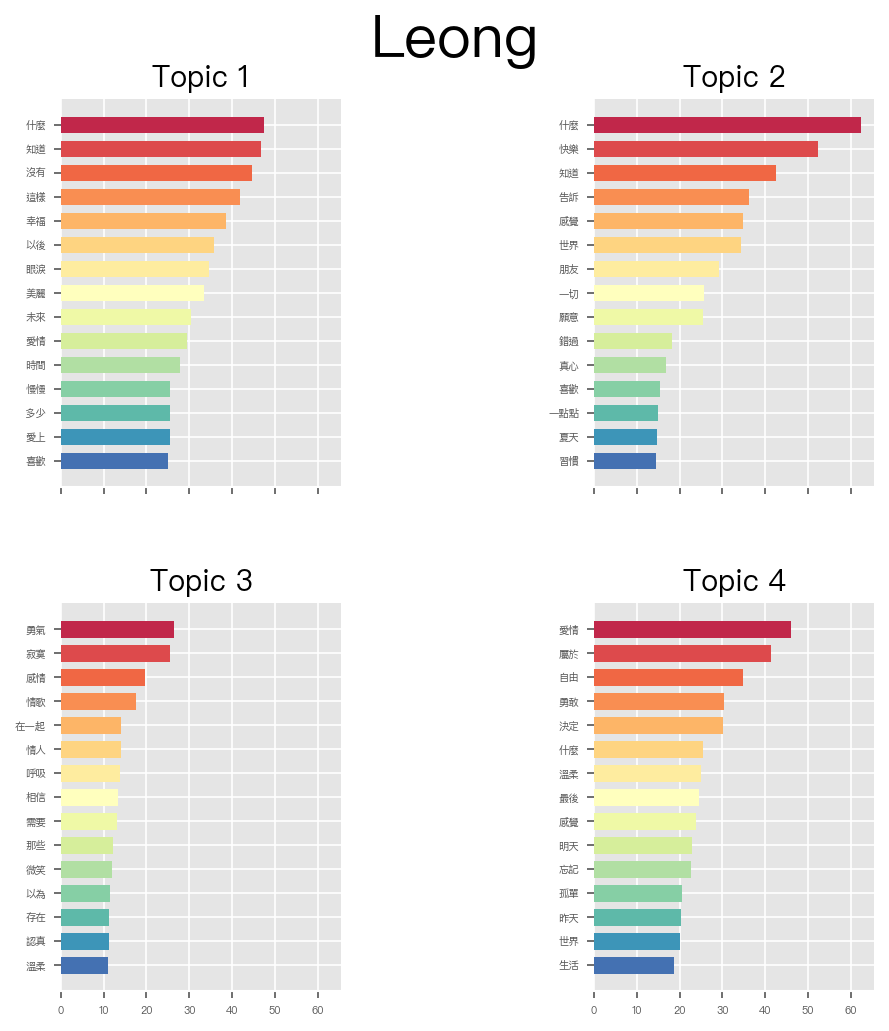

In [75]:
plot_top_words(best_lda, cv.get_feature_names(), n_top_words=15, title="Leong")

In [54]:
doc_topic_matrix = best_lda.transform(cv_matrix)

In [55]:
 num_of_topic = 4

In [ ]:
# %%time
# from sklearn.decomposition import LatentDirichletAllocation


# lda = LatentDirichletAllocation(n_components=num_of_topic, max_iter=10000, random_state=0,
#                                max_doc_update_iter=50, learning_method='online',
#                                batch_size=50, learning_offset = 50, n_jobs = -1)
# dt_matrix = lda.fit_transform(cv_matrix) # document matrix

In [77]:
features = pd.DataFrame(dt_matrix, columns = ["T"+str(n) for n in range(1,num_of_topic+1)])
features

,T1,T2,T3,T4
0,0.00595,0.00579,0.00601,0.98225
1,0.00905,0.43569,0.00929,0.54597
2,0.00716,0.00705,0.37360,0.61219
3,0.02412,0.21715,0.73676,0.02197
4,0.60882,0.11471,0.27066,0.00581
...,...,...,...,...
189,0.45723,0.00484,0.00464,0.53329
190,0.00938,0.00986,0.00912,0.97165
191,0.32356,0.06296,0.49933,0.11414
192,0.54256,0.00793,0.00812,0.44139


## Show topics and their weights

In [ ]:
# tt_matrix = lda.components_ # topic matrix
# for topic_weights in tt_matrix:
#     topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
#     topic = sorted(topic, key=lambda x: -x[1])
#     topic = [item for item in topic if item[1] > 0.6]
#     print(topic)
#     print()


In [56]:
topic_terms = best_lda.components_
top_terms = 20
topic_keywords_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:,:top_terms]
topic_keywords = vocab[topic_keywords_idxs]
topics = [', '.join(w) for w in topic_keywords]
pd.set_option('display.max_colwidth', None)
topics_df = pd.DataFrame(topics,
                        columns = ['Keywords per Topic'],
                        index = ["Topic"+str(n) for n in range(1,num_of_topic+1)])

In [57]:
topics_df

,Keywords per Topic
Topic1,"什麼, 知道, 沒有, 這樣, 幸福, 以後, 眼淚, 美麗, 未來, 愛情, 時間, 慢慢, 多少, 愛上, 喜歡, 生命, 一樣, 現在, 看見, 快樂"
Topic2,"什麼, 快樂, 知道, 告訴, 感覺, 世界, 朋友, 一切, 願意, 錯過, 真心, 喜歡, 一點點, 夏天, 習慣, 浪漫, 瞭解, 今天, 假裝, 發現"
Topic3,"勇氣, 寂寞, 感情, 情歌, 在一起, 情人, 呼吸, 相信, 需要, 那些, 微笑, 以為, 存在, 認真, 溫柔, 感動, 快樂, 回憶, 心碎, 過去"
Topic4,"愛情, 屬於, 自由, 勇敢, 決定, 什麼, 溫柔, 最後, 感覺, 明天, 忘記, 孤單, 昨天, 世界, 生活, 今天, 時候, 感謝, 發現, 溫暖"


In [58]:
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_colwidth', 200)


dt_df = pd.DataFrame(doc_topic_matrix,
                    columns=["Topic"+str(n) for n in range(1,num_of_topic+1)])

max_contrib_topics = dt_df.max(axis=0)
dominant_topics = max_contrib_topics.index
contrib_perc = max_contrib_topics.values
document_numbers = [dt_df[dt_df[t]==max_contrib_topics.loc[t]].index[0]
                    for t in dominant_topics]
documents = [norm_corpus[i] for i in document_numbers]

documents_df = pd.DataFrame({'Dominant Topic': dominant_topics,
                            'Contribution%': contrib_perc,
                            'DOCID': document_numbers,
                            'Topic': topics_df['Keywords per Topic'],
                            'Text': documents})

In [59]:
documents_df

,Dominant Topic,Contribution%,DOCID,Topic,Text
Topic1,Topic1,0.98836,18,"什麼, 知道, 沒有, 這樣, 幸福, 以後, 眼淚, 美麗, 未來, 愛情, 時間, 慢慢, 多少, 愛上, 喜歡, 生命, 一樣, 現在, 看見, 快樂",記得 次 牽 手 小 狗 走 厚厚 手 握 流汗 手 握 未來 那 晚 吃完 晚餐 愛河 小心 墜入 愛河 自行車 緩緩 溫柔 濕濕 吻 額頭 知不知道 掉 多少 頭髮 有 天 禿頭 想 辦法 知不知道 情話 小花 心 底 發芽 愛 帶給 許多 快樂 想 走到 後來 發生 什麼 事情 保存 愛 甜蜜 想 什麼 失去 愛 帶給 一些 回憶 走到 最後 什麼 愛 愛 每 天 美麗 此刻 愛 快...
Topic2,Topic2,0.98502,43,"什麼, 快樂, 知道, 告訴, 感覺, 世界, 朋友, 一切, 願意, 錯過, 真心, 喜歡, 一點點, 夏天, 習慣, 浪漫, 瞭解, 今天, 假裝, 發現",小 任性 鬧 情緒 讓 愛 淋 雨滴 放開 握緊 思念 手心 壞 習慣 倔 脾氣 道歉 忘記 那 什麼 計較 親密 跳到 背 上 海 邊 靠近 天堂 看 遠 笑 跑 橫越 海岸線 蜿蜒 個 微妙 體貼 知道 今天 情人節 次 聽 說 淚水 湧成 溫泉 個 愛 改變 知道 今天 情人節 看見 有 特別 讓 新 快樂 和 回憶 重疊 間奏 壞 習慣 倔 脾氣 道歉 忘記 那 什麽 計較 親密 ...
Topic3,Topic3,0.98604,31,"勇氣, 寂寞, 感情, 情歌, 在一起, 情人, 呼吸, 相信, 需要, 那些, 微笑, 以為, 存在, 認真, 溫柔, 感動, 快樂, 回憶, 心碎, 過去",有 些 事 問 有 些 人 等 許多 細節 湮沒 記得 那 副歌 情話 現實 反駁 句 情歌 安慰 寂寞 餵養 寂寞 聽 那 熟悉 前奏 回憶 逆流 成 河 淹沒 那些 情歌 唱 別 後 那 片 天空 說 希望 懂 愛恨 忐忑 陪 走過 情歌 告訴 唱 勇氣 沒 勇氣 沒 結果 每 個 夢 醒 時分 陪 數 傷痕 許多 細節 復活 唱起 那 首 歌 有 些 話 說 安可 讓 感動 讓 心痛...
Topic4,Topic4,0.98811,41,"愛情, 屬於, 自由, 勇敢, 決定, 什麼, 溫柔, 最後, 感覺, 明天, 忘記, 孤單, 昨天, 世界, 生活, 今天, 時候, 感謝, 發現, 溫暖",堅持 值得 堅持 相信 真 敢 追求 敢 擁有 算了 遇見 天真 屬於 昨天 之前 結局 決定 決定 屬於 明天 之後 憧憬 迷信 迷信 屬於 點點滴滴 傷心 忘記 屬於 閃閃 發亮 愛情 努力 努力 屬於 風 那 飛翔 屬於 海洋 那 洶湧 屬於 愛 來 來 敢 命中 注定 那 個 這裡 屬於 昨天 之前 結局 決定 決定 屬於 明天 之後 憧憬 迷信 迷信 屬於 點點滴滴 傷心 忘記 ...


In [84]:
##
## install: !conda install -c conda-forge pyldavis

import pyLDAvis
import pyLDAvis.sklearn
import dill

pyLDAvis.enable_notebook()
cv_matrix2 = np.matrix(cv_matrix)
pyLDAvis.sklearn.prepare(best_lda, cv_matrix2, cv, mds="PCoA")

/Users/Alvin/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=             x        y  topics  cluster     Freq
topic                                            
0     -0.01144 -0.08689       1        1 38.69459
3      0.09959  0.16866       2        1 26.45490
1     -0.19600  0.02952       3        1 19.61861
2      0.10785 -0.11130       4        1 15.23190, topic_info=    Term     Freq     Total Category  logprob  loglift
96    屬於 39.00000  39.00000  Default 30.00000 30.00000
41    告訴 39.00000  39.00000  Default 29.00000 29.00000
38    勇氣 25.00000  25.00000  Default 28.00000 28.00000
114   快樂 87.00000  87.00000  Default 27.00000 27.00000
180   朋友 28.00000  28.00000  Default 26.00000 26.00000
..   ...      ...       ...      ...      ...      ...
297   選擇  7.92514  31.77828   Topic4 -4.65080  0.49300
114   快樂  9.28582  87.23315   Topic4 -4.49240 -0.35830
133   感覺  7.95046  63.31971   Topic4 -4.64760 -0.19320
14    什麼  8.05375 135.75326   Topic4 -4.63470 -0.94290
150   擁有  7.07630  30.73087   Topic4 -4.76410  0.41330

[225 rows x 6 columns], token_table=      Topic    Freq Term
term                    
1         1 0.18588   一切
1         2 0.06196   一切
1         3 0.74351   一切
2         1 0.79567   一樣
2         4 0.17297   一樣
...     ...     ...  ...
324       3 0.96830   願意
327       2 0.19890   體貼
327       3 0.69615   體貼
328       1 0.89211   黎明
330       4 0.91406   默契

[356 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

## Clustering documents using topic model features

In [85]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=num_of_topic, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

/Users/Alvin/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,lyric,ClusterLabel
0,飄洋過海來看你,為你我用了 半年的積蓄飄洋過海的來看你\n為了這次相聚 我連見面時的呼吸都曾反覆練習\n言語從來沒能將我的情意表達千萬分之一\n為了這個遺憾 我在夜裡想了又想不肯睡去\n記憶它總是慢慢的累積 在我心中無法抹去\n為了你的承諾 我在最絕望的時候都忍著不哭泣\n陌生的城市啊 熟悉的角落裡\n也曾彼此安慰 也曾相擁嘆息 不管將會面對什麼樣的結局\n在漫天風沙裡望著你遠去 我竟悲傷得不能自己\n多...,1
1,微光,尋找螢火蟲的微光 等待沼澤中的璀璨\n你們的情話在歌唱 填滿空蕩蕩的夜晚\n露珠吻別夢醒的臉 迎接不識趣的日光\n埋怨先瞌睡的對方 懷著等不到的遺憾\n如今呆板的另一半 陪你看電視的螢光\n沙發乾淨得很穩當 屏幕閃爍得很孤單\n蘆葦在你心裡盪漾 沼澤早就煙消雲散\n你也厭倦每年元旦 在外面看煙火瀰漫\n回憶 短暫 人生 太長\n別為 剎那 淚光 錯過 滿天星光\n原諒螢火蟲沒膽量 受不了浪...,1
2,我好嗎,金黃的銀杏樹再次滿開了\n那一年樹下的約定已解散了\n儘管藍天仍像青春般清澈\n我們不再見了 自顧自活著\n再多問候往往與快樂無涉\n也只能獨自沈溺 思念的片刻\n淚水淹沒歲月 何時甘願 去跟遺憾求和\n曾經圓滿我的 碾碎我的 都回不去了\n不是心不死 還留你一個位置\n只是呼喚過的名字\n要怎麼從回憶的固執 徹底消失\n你好嗎 說給空氣聽 徒勞的心情\n刻骨銘心的愛情 只留下無處寄託的感...,1
3,慢冷,說完了 好像話都說完了\n總是沉默對坐著\n眼裡是濃濃夜色\n感情是偏執的 越愛越是偏執的\n不相信我看到的\n硬要說裂縫不過 是皺褶\n怎麼先熾熱的卻先變冷了\n慢熱的卻停不了還在沸騰著\n看時光任性快跑隨意就轉折\n慢冷的人啊 會自我折磨\n衝動的人向來聽不見挽留\n這世界大得讓你很難不旅遊\n浪漫讓你溫柔 也讓你最惹人 淚流\n牽你手 若無其事牽你手\n你像被動的木偶\n多狠多讓人厭...,3
4,如愛所願,忘了多久的好久不見\n曾以為再也不見\n青春的執著堅決\n換一張笑臉\n放下痛過的月月年年\n迴避的記憶斷片\n此刻交疊了視線\n不再是解不開的結\n歷練讓我們都變得\n比從前更溫熱\n抹去了尖銳沒有誰對誰的虧欠\n離開後的心碎\n諒解裡的後悔\n都不是故事的終點\n我們都如愛所願 變成更幸福的人\n曾執迷的緣份 笑談成傷痕\n此刻 能如愛所願 謝謝從前\n換另一種身份 祝福彼此下個旅程\...,2
...,...,...,...
189,溫柔,走在風中 今天陽光 突然好溫柔\n天的溫柔 地的溫柔 像你抱著我\n然後發現 你的改變 孤單的今後\n如果冷 該怎麼度過\n天邊風光 身邊的我 都不在你眼中\n你的眼中 藏著什麼 我從來都不懂\n沒有關係 你的世界 就讓你擁有\n不打擾 是我的溫柔\n不知道 不明了 不想要 為什麼 我的心\n明明是想靠近 卻孤單的黎明\n不知道 不明了 不想要 為什麼 我的心\n那愛情的綺麗 總是在孤單裡...,1
190,可惜不是妳,這一刻 突然覺得好熟悉 像昨天 今天同時在放映\n我這句語氣 原來好像妳 不就是我們愛過的證據\n差一點騙了自己騙了妳 愛與被愛不一定成正比\n我知道被疼是一種運氣 但我無法完全交出自己\n努力為你改變 卻變不了 預留的伏線\n以為在妳身邊 那也算永遠\n彷彿還是昨天 可是昨天 已非常遙遠\n但閉上我雙眼 我還看得見\n可惜不是妳 陪我到最後 曾一起走卻走失那路口\n感謝那是妳 牽過我的手...,1
191,不必在乎我是誰,我覺得有點累 我想我缺少安慰\n我的生活如此乏味 生命像花一樣枯萎\n我整夜不能睡 可能是因為煙和咖啡\n如果是因為沒有人陪 我願意敞開心扉\n＊幾次真的想讓自己醉 讓自己遠離那許多恩怨是非\n讓隱藏已久的渴望隨風飛 喔～(請你)忘了我是誰\n女人若沒人愛多可悲 就算是有人聽我的歌會流淚\n我還是真的期待有人追 何必在乎我是誰\n我想你說的對 寂寞使人憔悴\n是寂寞使人心碎 戀愛中的女人纔...,3
192,追光者,如果說你是海上的煙火\n我是浪花的泡沫\n某一刻你的光照亮了我\n如果說你是遙遠的星河\n耀眼得讓人想哭\n我是追逐著你的眼眸\n總在孤單時候眺望夜空\n我可以跟在你身後\n像影子追著光夢遊\n我可以等在這路口\n不管你會不會經過\n每當我為你抬起頭\n連眼淚都覺得自由\n有的愛像陽光傾落\n邊擁有邊失去著\n如果說你是夏夜的螢火\n孩子們為你唱歌\n那麼我是想要畫你的手\n你看我多麼渺小...,2


## Visualize topic distributions

/Users/Alvin/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


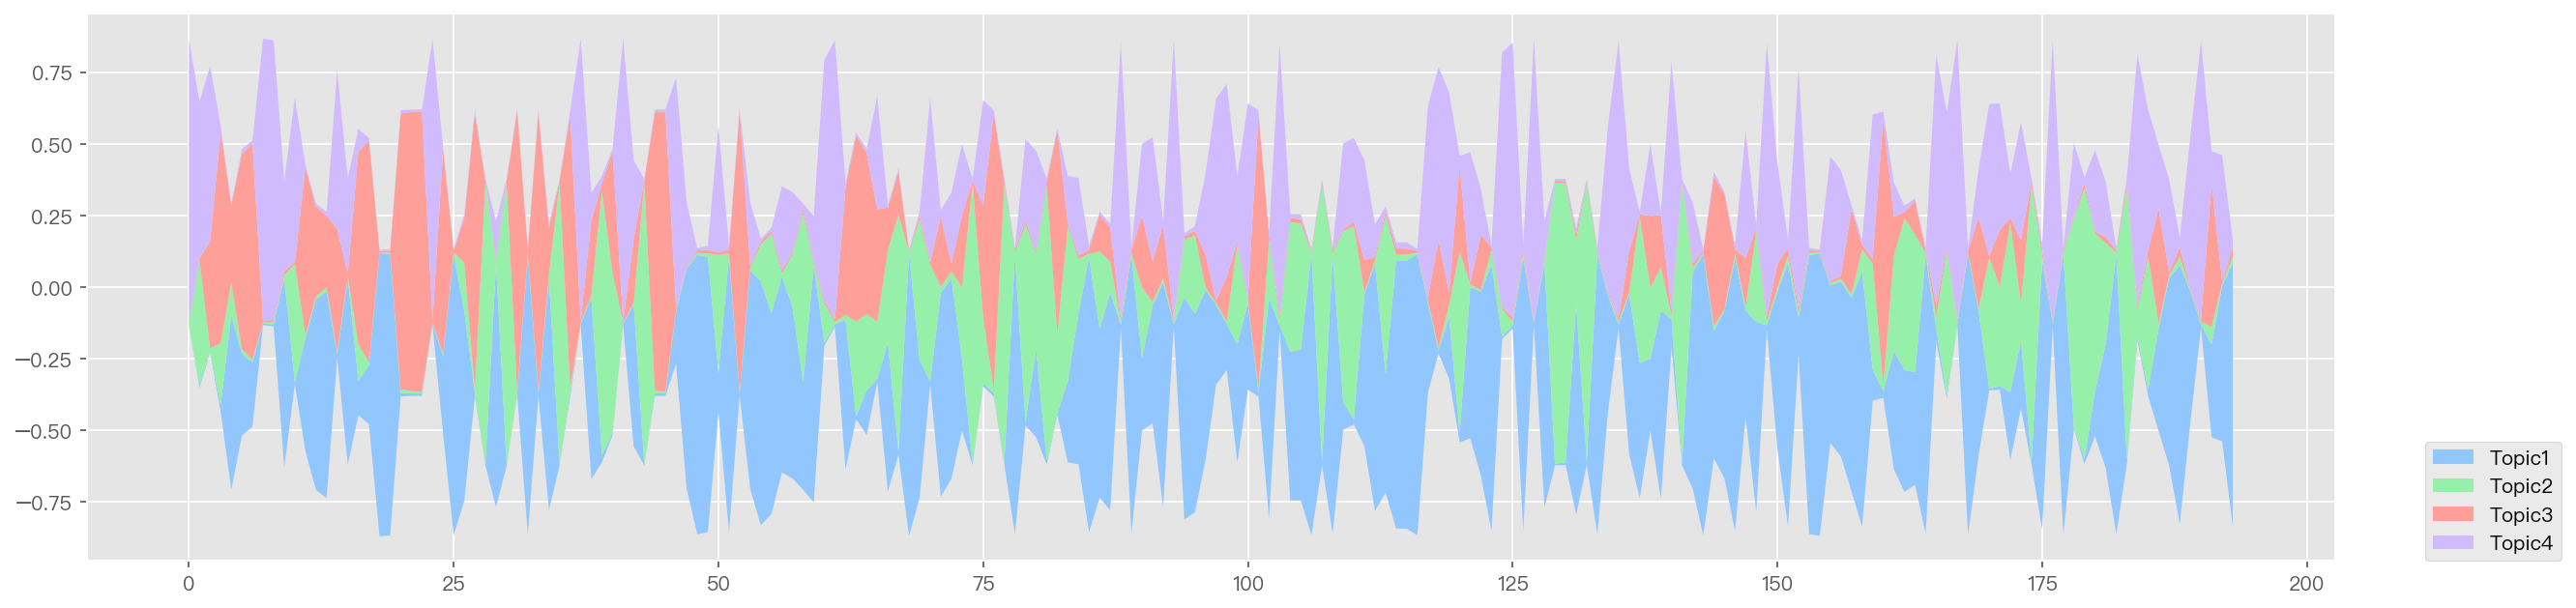

In [87]:
x_axis = corpus_df.index
y_axis = dt_df

fig, ax = plt.subplots(figsize=(20,5), dpi=150)

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

In [89]:
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
# lda_model - LatentDirichletAllocation()
# vect - CountVectorizer()
# texts - the list of tokenized words
norm_corpus
norm_corpus_tokens = [doc.split() for doc in norm_corpus]


metric_coherence_gensim(measure='c_v', 
                        top_n=10, 
                        topic_word_distrib= lda.components_, 
                        dtm=cv.fit_transform(norm_corpus), 
                        vocab=np.array(cv.get_feature_names()), 
                        texts=norm_corpus_tokens)

/Users/Alvin/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Alvin/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


[0.3301657819299678,
 0.30907842422144227,
 0.24949988709851803,
 0.26112911930869515]